<center><h1>Chen_PoHao_HW2</h1></center>
<br>
<br>

Name: Po Hao Chen
<br>
Github Username: pohaoc29
<br>
USC ID: 4213309111

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Get the Cycle Power Plant Data Set

In [2]:
df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


### (b) Exploring the data

#### i. rows and columns

In [3]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


#### There are 9568 rows and 5 columns in the data set. Each row represents each data. Each column represents every individual feature.

#### ii. pairwise scatterplots of all the varianbles

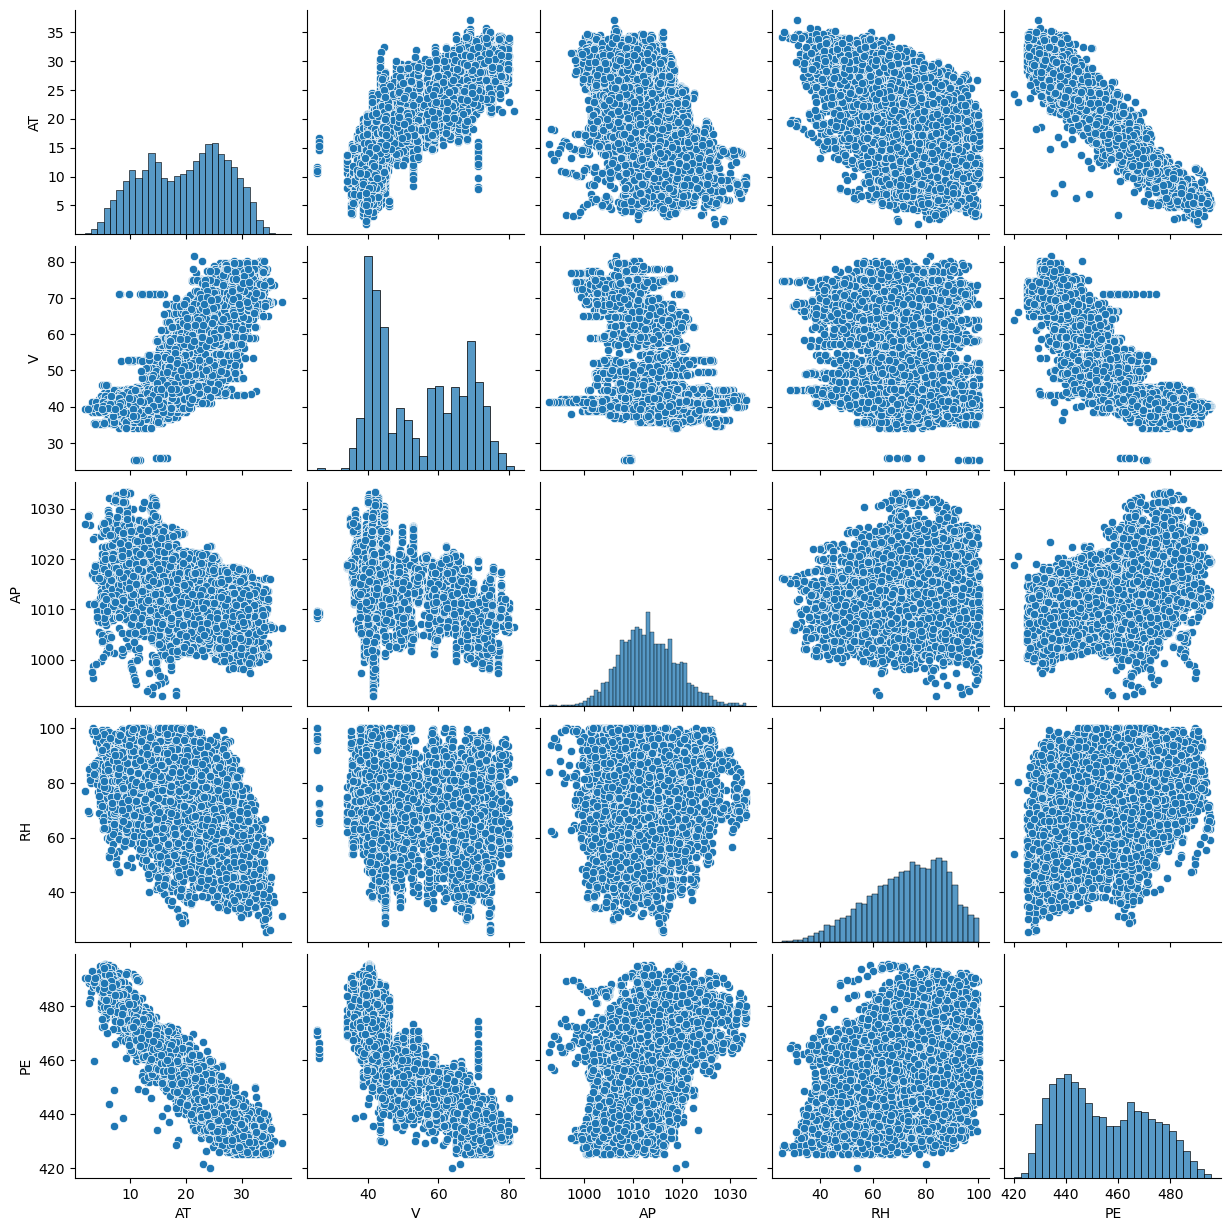

In [5]:
sns.pairplot(df)

* In the scatter plot, AT and V likely have a more linear relationship to PE than other variables because the data points look more dense and central in a straight-line form. <br>
* AT and V also seem to have a correlation between them (stronger than the others among all features). <br>
* AP seems to have nearly normal distribution(bell shape).

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [6]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [7]:
df_columns = ['AT','V','AP','RH','PE']

summary_table = pd.DataFrame(columns=df_columns)

range_list = list()
IQR_list = list()
for i in range(5):
    range_list.append(df[df_columns[i]].max()-df[df_columns[i]].min())
    IQR_list.append(df[df_columns[i]].quantile(0.75)-df[df_columns[i]].quantile(0.25))


summary_table.loc['Mean'] = df.mean()
summary_table.loc['Median'] = df.quantile(0.50)
summary_table.loc['Range'] = [i for i in range_list]
summary_table.loc['First quartile'] = df.quantile(0.25)
summary_table.loc['Third quartile'] = df.quantile(0.75)
summary_table.loc['Interquartile range'] = [i for i in IQR_list]
summary_table

,AT,V,AP,RH,PE
Mean,19.651231,54.305804,1013.259078,73.308978,454.365009
Median,20.345000,52.080000,1012.940000,74.975000,451.550000
Range,35.300000,56.200000,40.410000,74.600000,75.500000
First quartile,13.510000,41.740000,1009.100000,63.327500,439.750000
Third quartile,25.720000,66.540000,1017.260000,84.830000,468.430000
Interquartile range,12.210000,24.800000,8.160000,21.502500,28.680000


### (c) Simple Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm

# X = df.drop('PE', axis=1)
# y = df.PE
# # Splitting dataset into test/train
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

SLRmodel = LinearRegression()

SLRcoef_list = list()

#### AT

In [9]:
print('AT')
ATXtrain = np.array(df.AT).reshape(-1,1)
SLRmodel.fit(ATXtrain, df.PE)
print(f'Coefficient: {SLRmodel.coef_}')
print(f'Intercept: {SLRmodel.intercept_}')
SLRcoef_list.append(SLRmodel.coef_)

ATresponse = SLRmodel.intercept_ + SLRmodel.coef_ * df.AT
#stats.ttest_ind(SLRmodel.coef_,df.AT)
stats.ttest_ind(ATresponse,df.AT)

AT
Coefficient: [-2.17131996]
Intercept: 497.0341198927665


TtestResult(statistic=2386.8190303188435, pvalue=0.0, df=19134.0)

In [10]:
ATX2 = sm.add_constant(ATXtrain)
model = sm.OLS(df.PE, ATX2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:33:51   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

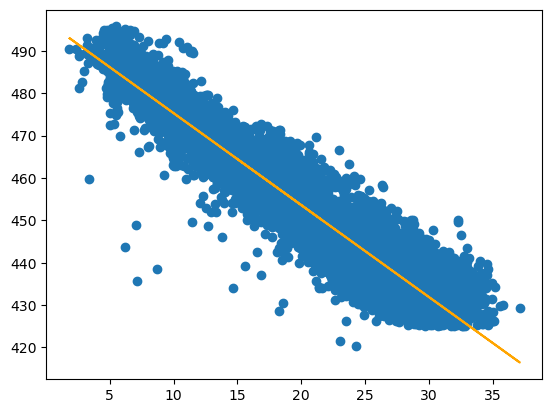

In [11]:
plt.scatter(df.AT, df.PE)
plt.plot(df.AT, SLRmodel.intercept_ + SLRmodel.coef_ * df.AT, 'orange')

#### V

In [12]:
print('V')
VXtrain = np.array(df.V).reshape(-1,1)
SLRmodel.fit(VXtrain, df.PE)
print(f'Coefficient: {SLRmodel.coef_}')
print(f'Intercept: {SLRmodel.intercept_}')
SLRcoef_list.append(SLRmodel.coef_)

#stats.ttest_ind(SLRmodel.coef_,df.V)
Vresponse = SLRmodel.intercept_ + SLRmodel.coef_ * df.V
stats.ttest_ind(Vresponse,df.V)

V
Coefficient: [-1.16813513]
Intercept: 517.8015263083853


TtestResult(statistic=2002.57135476186, pvalue=0.0, df=19134.0)

In [13]:
V2 = sm.add_constant(VXtrain)
Vmodel = sm.OLS(df.PE, V2)
Vresult = Vmodel.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:33:51   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

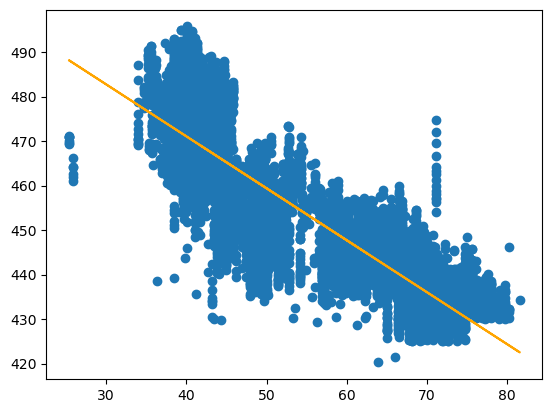

In [14]:
plt.scatter(df.V, df.PE)
plt.plot(df.V, SLRmodel.intercept_ + SLRmodel.coef_ * df.V, 'orange')

#### AP

In [15]:
print('AP')
APXtrain = np.array(df.AP).reshape(-1,1)
SLRmodel.fit(APXtrain, df.PE)
print(f'Coefficient: {SLRmodel.coef_}')
print(f'Intercept: {SLRmodel.intercept_}')
SLRcoef_list.append(SLRmodel.coef_)

#stats.ttest_ind(SLRmodel.coef_,df.AP)
APresponse = SLRmodel.intercept_ + SLRmodel.coef_ * df.AP
stats.ttest_ind(APresponse,df.AP)

AP
Coefficient: [1.48987167]
Intercept: -1055.2609889844364


TtestResult(statistic=-5130.192775311085, pvalue=0.0, df=19134.0)

In [16]:
AP2 = sm.add_constant(APXtrain)
APmodel = sm.OLS(df.PE, AP2)
APresult = APmodel.fit()
print(APresult.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:33:51   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

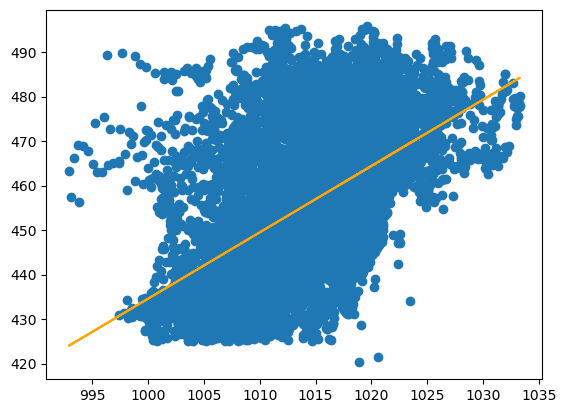

In [17]:
plt.scatter(df.AP, df.PE)
plt.plot(df.AP, SLRmodel.intercept_ + SLRmodel.coef_ * df.AP, 'orange')

#### RH

In [18]:
print('RH')
RHXtrain = np.array(df.RH).reshape(-1,1)
SLRmodel.fit(RHXtrain, df.PE)
print(f'Coefficient: {SLRmodel.coef_}')
print(f'Intercept: {SLRmodel.intercept_}')
SLRcoef_list.append(SLRmodel.coef_)

#stats.ttest_ind(SLRmodel.coef_,df.RH)

RHresponse = SLRmodel.intercept_ + SLRmodel.coef_ * df.RH
stats.ttest_ind(RHresponse,df.RH)

RH
Coefficient: [0.4556501]
Intercept: 420.96176615548376


TtestResult(statistic=2323.132398377905, pvalue=0.0, df=19134.0)

In [19]:
RH2 = sm.add_constant(RHXtrain)
RHmodel = sm.OLS(df.PE, RH2)
RHresult = model.fit()
print(RHresult.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:33:52   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

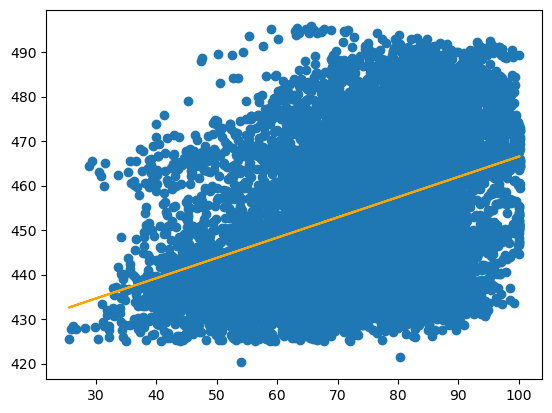

In [20]:
plt.scatter(df.RH, df.PE)
plt.plot(df.RH, SLRmodel.intercept_ + SLRmodel.coef_ * df.RH, 'orange')

### Are there any outliers that you would like to remove from your data for each of these regression tasks?

#### No, I prefer to keep outliers, which can help the model avoid being too biased; on the other hand, outliers seem not to be wildly exaggerated to the line.

### (d) Multiple Regression

In [21]:
X_train = df.drop('PE', axis=1)
y_train = df.PE

# Regressor model
MLRmodel = LinearRegression()
MLRmodel.fit(X_train, y_train)

LinearRegression()

In [22]:
# Regressor coefficients and intercept
print(f'Coefficient: {MLRmodel.coef_}')
print(f'Intercept: {MLRmodel.intercept_}')

Coefficient: [-1.97751311 -0.23391642  0.06208294 -0.1580541 ]
Intercept: 454.6092743153099


In [23]:
MLR2 = sm.add_constant(X_train)
MLRsmmodel = sm.OLS(df.PE, MLR2)
MLRresult = MLRsmmodel.fit()
print(MLRresult.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:33:52   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

### For which predictors can we reject the null hypothesis H0 :βj =0?

#### The meaning of a p-value is “The probability of observing a test statistic at least as extreme as the one you have, if the null hypothesis is true." In this case, the four p-values corresponding to these four predictors(AT, V, AP, RH) are all 0.000 in this table(It probably is near 0, not really 0; it shows 0.000 because of the roundup mechanism.). Therefore, that means four of them(AT, V, AP, RH) reject the null hypothesis H0:βj =0

### (e) 1c Compare to 1d

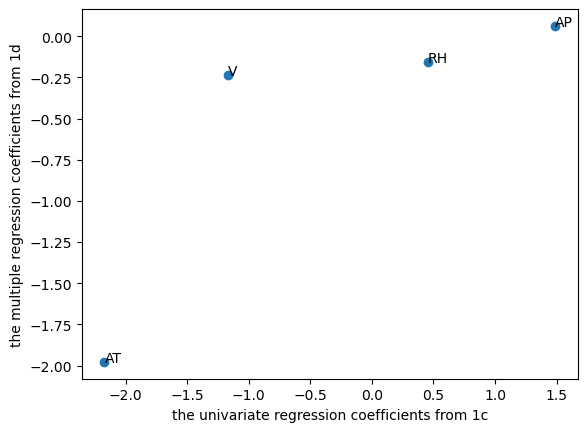

In [24]:
fig, ax = plt.subplots()

ax.scatter(SLRcoef_list,MLRmodel.coef_)
plt.xlabel("the univariate regression coefficients from 1c")
plt.ylabel("the multiple regression coefficients from 1d")

label_list = ['AT','V','AP','RH']
for i,txt in enumerate(label_list):
    ax.annotate(txt, (SLRcoef_list[i], MLRmodel.coef_[i]))

plt.show()

### (f) Nonlinear Association

In [25]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
ATXtrain_trans = poly.fit_transform(ATXtrain)

ATXtrain2 = sm.add_constant(ATXtrain_trans)
ATNAmodel = sm.OLS(df.PE, ATXtrain2)
ATNAresult = ATNAmodel.fit()
print(ATNAresult.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:33:52   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

In [26]:
VXtrain_trans = poly.fit_transform(VXtrain)

VXtrain2 = sm.add_constant(VXtrain_trans)
VNAmodel = sm.OLS(df.PE, VXtrain2)
VNAresult = VNAmodel.fit()
print(VNAresult.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:33:52   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

In [27]:
APXtrain_trans = poly.fit_transform(APXtrain)

APXtrain2 = sm.add_constant(APXtrain_trans)
APNAmodel = sm.OLS(df.PE, ATXtrain2)
APNAresult = APNAmodel.fit()
print(APNAresult.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:33:52   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

In [28]:
RHXtrain_trans = poly.fit_transform(RHXtrain)

RHXtrain2 = sm.add_constant(RHXtrain_trans)
RHNAmodel = sm.OLS(df.PE, RHXtrain2)
RHNAresult = RHNAmodel.fit()
print(RHNAresult.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:33:52   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

### (g) Interactions of Predictors

In [29]:
Inter_train = X_train
columns = ['AT', 'V', 'AP', 'RH']
new_column_list = ['AT*V', 'AT*AP', 'AT*RH', 'V*AP', 'V*RH', 'AP*RH']

k = 0
for i in range(3):
    for j in range(i+1,4):
        Inter_train[new_column_list[k]] = Inter_train[columns[i]] * Inter_train[columns[j]]
        k+=1
            
Inter_train

,AT,V,AP,RH,AT*V,AT*AP,AT*RH,V*AP,V*RH,AP*RH
0,14.96,41.76,1024.07,73.17,624.7296,15320.0872,1094.6232,42765.1632,3055.5792,74931.2019
1,25.18,62.96,1020.04,59.08,1585.3328,25684.6072,1487.6344,64221.7184,3719.6768,60263.9632
2,5.11,39.40,1012.16,92.14,201.3340,5172.1376,470.8354,39879.1040,3630.3160,93260.4224
3,20.86,57.32,1010.24,76.64,1195.6952,21073.6064,1598.7104,57906.9568,4393.0048,77424.7936
4,10.82,37.50,1009.23,96.62,405.7500,10919.8686,1045.4284,37846.1250,3623.2500,97511.8026
...,...,...,...,...,...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,827.3385,16883.2665,1515.1500,50386.1569,4521.7900,92274.9100
9564,13.19,39.18,1023.67,66.78,516.7842,13502.2073,880.8282,40107.3906,2616.4404,68360.6826
9565,31.32,74.33,1012.92,36.48,2328.0156,31724.6544,1142.5536,75290.3436,2711.5584,36951.3216
9566,24.48,69.45,1013.86,62.39,1700.1360,24819.2928,1527.3072,70412.5770,4332.9855,63254.7254


In [30]:
Inter_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   AT*V    9568 non-null   float64
 5   AT*AP   9568 non-null   float64
 6   AT*RH   9568 non-null   float64
 7   V*AP    9568 non-null   float64
 8   V*RH    9568 non-null   float64
 9   AP*RH   9568 non-null   float64
dtypes: float64(10)
memory usage: 747.6 KB


In [31]:
pair_LRModel = LinearRegression()

pair_LRModel.fit(Inter_train, df.PE)

print(f'Coefficient: {pair_LRModel.coef_}')
print(f'Intercept: {pair_LRModel.intercept_}')

Coefficient: [-4.34701412e+00 -7.67485763e+00 -1.52354642e-01  1.57090705e+00
  2.09709231e-02  1.75904518e-03 -5.23035364e-03  6.81235433e-03
  8.38633179e-04 -1.61179894e-03]
Intercept: 685.7824681474581


In [32]:
Inter_train2 = sm.add_constant(Inter_train)
pair_LRsmmodel = sm.OLS(df.PE, Inter_train2)
pair_LRresult = pair_LRsmmodel.fit()
print(pair_LRresult.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:33:52   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

### (h) Improvement

#### Improve the model using possible interaction terms or nonlinear associations between the predictors and response.

In [33]:
# Select the predictors whose p-value is smaller than 0.05
X = Inter_train.drop(['AT', 'AT*AP', 'V*RH'], axis=1)
y = df.PE
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

improv_LRmodel = LinearRegression()
improv_LRmodel.fit(X_train, y_train)
y_pred = improv_LRmodel.predict(X_test)
y_pred_train = improv_LRmodel.predict(X_train)


print(f'Coefficient: {improv_LRmodel.coef_}')
print(f'Intercept: {improv_LRmodel.intercept_}')

Coefficient: [ 7.46252849e+00  1.25739000e+00  1.09103861e+01 -6.05341254e-03
 -2.14630323e-02 -7.50904865e-03 -1.04674602e-02]
Intercept: -797.6222216965548


In [34]:
X_train2 = sm.add_constant(X_train)
improv_LRsmmodel = sm.OLS(y_train, X_train2)
improv_LRresult = improv_LRsmmodel.fit()
print(improv_LRresult.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 1.224e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:33:52   Log-Likelihood:                -19702.
No. Observations:                6697   AIC:                         3.942e+04
Df Residuals:                    6689   BIC:                         3.948e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -797.6222     83.120     -9.596      0.0

In [35]:
train_error_rate = 1-improv_LRmodel.score(X_train.values, y_train)

test_error_rate = 1-improv_LRmodel.score(X_test.values, y_test)

print("The training error rate: ", train_error_rate)
print("The test error rate: ", test_error_rate)

The training error rate:  0.07241772894558318
The test error rate:  0.07370226136021407


Calculate train and test MSE of the model

In [36]:
from sklearn.metrics import mean_squared_error

improv_mse = mean_squared_error(y_test, y_pred)
improv_train_mse = mean_squared_error(y_train, y_pred_train)

print("train MSE:", improv_train_mse)
print("test MSE:", improv_mse)

train MSE: 21.03211533762633
test MSE: 21.60652863292746


#### Run a regression model involving all possible interaction terms and quadratic nonlinearities

In [37]:
poly = PolynomialFeatures(degree=3)
AllXtrain = df.drop('PE', axis = 1)
AllXtrain_trans = poly.fit_transform(AllXtrain)

X = AllXtrain_trans
y = df.PE
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


poly_list = poly.get_feature_names_out(['AT', 'V', 'AP', 'RH'])
poly_list

array(['1', 'AT', 'V', 'AP', 'RH', 'AT^2', 'AT V', 'AT AP', 'AT RH',
       'V^2', 'V AP', 'V RH', 'AP^2', 'AP RH', 'RH^2', 'AT^3', 'AT^2 V',
       'AT^2 AP', 'AT^2 RH', 'AT V^2', 'AT V AP', 'AT V RH', 'AT AP^2',
       'AT AP RH', 'AT RH^2', 'V^3', 'V^2 AP', 'V^2 RH', 'V AP^2',
       'V AP RH', 'V RH^2', 'AP^3', 'AP^2 RH', 'AP RH^2', 'RH^3'],
      dtype=object)

In [38]:
X_train2 = sm.add_constant(X_train)
Allpoly_LRsmmodel = sm.OLS(y_train, X_train2)
Allpoly_LRresult = Allpoly_LRsmmodel.fit()
print(Allpoly_LRresult.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     3226.
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:33:52   Log-Likelihood:                -19011.
No. Observations:                6697   AIC:                         3.809e+04
Df Residuals:                    6663   BIC:                         3.832e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3273      0.822      0.398      0.6

In [39]:
#Get all the X whose p value is smaller than 0.05.
Allpsb_list = list()
num = list()
for i in range(1,36):
    if(float(Allpoly_LRresult.summary().tables[1].data[i][4]) < 0.05): #p-value < 0.05
        Allpsb_list.append(poly_list[i-1])
        num.append(i-1)
        print(poly_list[i-1])

V
AT RH
V^2
V AP
V RH
RH^2
AT V^2
AT V RH
AT AP RH
AT RH^2
V^3
V^2 AP
V^2 RH
V AP RH
V RH^2
AP RH^2
RH^3


In [40]:
Allpsb_list

['V',
 'AT RH',
 'V^2',
 'V AP',
 'V RH',
 'RH^2',
 'AT V^2',
 'AT V RH',
 'AT AP RH',
 'AT RH^2',
 'V^3',
 'V^2 AP',
 'V^2 RH',
 'V AP RH',
 'V RH^2',
 'AP RH^2',
 'RH^3']

In [41]:
Allpsb_train = pd.DataFrame(columns = Allpsb_list)
newData = list()

for k in range(len(AllXtrain_trans)):
    newData.clear()
    for i in range(len(Allpsb_list)):
        newData.append(AllXtrain_trans[k][num[i]])
    Allpsb_train.loc[k] = newData


Allpsb_train

,V,AT RH,V^2,V AP,V RH,RH^2,AT V^2,AT V RH,AT AP RH,AT RH^2,V^3,V^2 AP,V^2 RH,V AP RH,V RH^2,AP RH^2,RH^3
0,41.76,1094.6232,1743.8976,42765.1632,3055.5792,5353.8489,26088.708096,45711.464832,1.120971e+06,80093.579544,72825.163776,1.785873e+06,127600.987392,3.129127e+06,223576.730064,5.482716e+06,391741.124013
1,62.96,1487.6344,3963.9616,64221.7184,3719.6768,3490.4464,99812.553088,93661.461824,1.517447e+06,87889.440352,249571.022336,4.043399e+06,234190.851328,3.794219e+06,219758.505344,3.560395e+06,206215.573312
2,39.40,470.8354,1552.3600,39879.1040,3630.3160,8489.7796,7932.559600,18550.914760,4.765608e+05,43382.773756,61162.984000,1.571237e+06,143034.450400,3.674461e+06,334497.316240,8.593015e+06,782248.292344
3,57.32,1598.7104,3285.5824,57906.9568,4393.0048,5873.6896,68537.248864,91638.080128,1.615081e+06,122525.165056,188329.583168,3.319227e+06,251807.035136,4.437989e+06,336679.887872,5.933836e+06,450159.570944
4,37.50,1045.4284,1406.2500,37846.1250,3623.2500,9335.4244,15215.625000,39203.565000,1.055078e+06,101009.292008,52734.375000,1.419230e+06,135871.875000,3.656693e+06,350078.415000,9.421590e+06,901988.705528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9563,49.69,1515.1500,2469.0961,50386.1569,4521.7900,8281.0000,41110.450065,75287.803500,1.536377e+06,137878.650000,122689.385209,2.503688e+06,224687.745100,4.585140e+06,411482.890000,8.397017e+06,753571.000000
9564,39.18,880.8282,1535.0724,40107.3906,2616.4404,4459.5684,20247.604956,34510.848876,9.016774e+05,58821.707196,60144.136632,1.571408e+06,102512.134872,2.678372e+06,174725.889912,4.565126e+06,297809.977752
9565,74.33,1142.5536,5524.9489,75290.3436,2711.5584,1330.7904,173041.399548,84926.009088,1.157315e+06,41680.355328,410669.451737,5.596331e+06,201550.135872,2.746592e+06,98917.650432,1.347984e+06,48547.233792
9566,69.45,1527.3072,4823.3025,70412.5770,4332.9855,3892.5121,118074.445200,106071.485040,1.548476e+06,95288.696208,334978.358625,4.890153e+06,300925.842975,4.393041e+06,270334.965345,3.946462e+06,242853.829919


In [42]:
# Create the training attribute set
X = Allpsb_train
y = df.PE
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Allpsb_LRmodel = LinearRegression()
Allpsb_LRmodel.fit(X_train, y_train)
y_pred = Allpsb_LRmodel.predict(X_test)
y_pred_train = Allpsb_LRmodel.predict(X_train)


print(f'Coefficient: {Allpsb_LRmodel.coef_}')
print(f'Intercept: {Allpsb_LRmodel.intercept_}')

Coefficient: [-5.52638966e+00 -1.11981675e-01  9.86504227e-02  6.78886984e-03
 -1.56462291e-01  1.05510140e-01  1.39390095e-04  1.29630758e-04
  5.21576851e-05  2.81311869e-04  2.55362286e-04 -1.45845267e-04
 -1.12186985e-05  1.81262967e-04 -1.83100583e-04 -1.04246918e-04
  7.05895448e-06]
Intercept: 466.6819826579221


In [43]:
X_train2 = sm.add_constant(X_train)
Allpsb_LRsmmodel = sm.OLS(y_train, X_train2)
Allpsb_LRresult = Allpsb_LRsmmodel.fit()
print(Allpsb_LRresult.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     6010.
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:33:55   Log-Likelihood:                -19147.
No. Observations:                6697   AIC:                         3.833e+04
Df Residuals:                    6679   BIC:                         3.845e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        466.6820      8.763     53.258      0.0

In [44]:
Allpsb_train_error_rate = 1-Allpsb_LRmodel.score(X_train.values, y_train)

Allpsb_test_error_rate = 1-Allpsb_LRmodel.score(X_test.values, y_test)

print("The training error rate: ", Allpsb_train_error_rate)
print("The test error rate: ", Allpsb_test_error_rate)

The training error rate:  0.0613574335998015
The test error rate:  0.06270051786152586


Calculate train and test MSE of the model

In [45]:
Allpsb_mse = mean_squared_error(y_test, y_pred)
Allpsb_train_mse = mean_squared_error(y_train, y_pred_train)

print("train MSE:", Allpsb_train_mse)
print("test MSE:", Allpsb_mse)

train MSE: 17.819899064516044
test MSE: 18.381261435836397


#### (I.) Improve the model using possible interaction terms or nonlinear associations between the predictors and response.
train MSE: 21.03211533762633<br>
test MSE: 21.60652863292746

#### (II.) Run a regression model involving all possible interaction terms and quadratic nonlinearities.
train MSE: 17.819899064516044<br>
test MSE: 18.381261435836397

#### The model using possible interaction terms and nonlinear associations has a good result in training error MSE and test error MSE. On the other hand, the model, which considers all possible interaction terms and quadratic nonlinearities, even has lower training and test error rates.

### (i) KNN

#### Normalized Features

In [46]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

X = df.drop('PE', axis=1) 
X_scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)
X_scaled = pd.DataFrame(X_scaler.transform(X))

y = df.PE
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

knnModel = KNeighborsRegressor()

train_errors = list()
test_errors = list()
ks=list()
train_mse_list = list()
test_mse_list = list()

errorbestk = list()
bestk = list()
best_MSE = 100
best_test_error = 1

for k in range(1,101):
    knnModel.set_params(n_neighbors=k)
    knnModel.fit(X_train, y_train)
    #knnpred = knnModel.predict(X_test.values)
    
    knn_train_error_rate = 1-knnModel.score(X_train.values, y_train)
    train_errors.append(knn_train_error_rate)
    knn_test_error_rate = 1-knnModel.score(X_test.values, y_test)
    test_errors.append(knn_test_error_rate)
    
    y_pred = knnModel.predict(X_test)
    y_pred_train = knnModel.predict(X_train)
    knn_test_mse = mean_squared_error(y_test, y_pred)
    test_mse_list.append(knn_test_mse)
    knn_train_mse = mean_squared_error(y_train, y_pred_train)
    train_mse_list.append(knn_train_mse)

    
    ks.append(k)
    print("k =",k)
    print("Train error rate: ", knn_train_error_rate)
    print("Test error rate: ", knn_test_error_rate)
    print("train MSE:", knn_train_mse)
    print("test MSE:", knn_test_mse)
    print()
    
    if(knn_test_error_rate < best_test_error):
        errorbestk.clear()
        best_test_error = knn_test_error_rate
        errorbestk.append(k)
    elif(knn_test_error_rate == best_test_error):
        errorbestk.append(k)
    else:
        continue
    
    # Specify the best k base on the test MSE
    if(knn_test_mse < best_MSE):
        bestk.clear()
        best_MSE = knn_test_mse
        bestk.append(k)
    elif(knn_test_mse == best_MSE):
        bestk.append(k)
    else:
        continue
        
print("\nbest k = ",bestk)
print("best test MSE = ", best_MSE)
print("\nbest error rate k = ",errorbestk)
print("best test error rate = ", best_test_error)

k = 1
Train error rate:  0.0
Test error rate:  0.062216792323414816
train MSE: 0.0
test MSE: 18.239452629745728

k = 2
Train error rate:  0.017882566697036917
Test error rate:  0.05384059695837362
train MSE: 5.193592933403015
test MSE: 15.783890186346213

k = 3
Train error rate:  0.02484865001300962
Test error rate:  0.04993278090110187
train MSE: 7.2167365735901665
test MSE: 14.63827622586013

k = 4
Train error rate:  0.02923113453274928
Test error rate:  0.04894484562993062
train MSE: 8.489531526243093
test MSE: 14.348653474399166

k = 5
Train error rate:  0.03313876313172148
Test error rate:  0.0493664664507415
train MSE: 9.624415160220996
test MSE: 14.47225568373389

k = 6
Train error rate:  0.0356054733504515
Test error rate:  0.049445710637589735
train MSE: 10.340816165613125
test MSE: 14.495486881264753

k = 7
Train error rate:  0.03797689545503902
Test error rate:  0.049971543908950866
train MSE: 11.029542862018635
test MSE: 14.649639975404996

k = 8
Train error rate:  0.039346

k = 59
Train error rate:  0.05911841100835835
Test error rate:  0.05951445834442681
train MSE: 17.1696248558044
test MSE: 17.447237365042124

k = 60
Train error rate:  0.05925083894491112
Test error rate:  0.05960230647507314
train MSE: 17.208085598443756
test MSE: 17.472990891665706

k = 61
Train error rate:  0.05937455776863465
Test error rate:  0.059748144391846836
train MSE: 17.244016973369124
test MSE: 17.515744683291413

k = 62
Train error rate:  0.05950362786203356
Test error rate:  0.05981155090988621
train MSE: 17.281502505303525
test MSE: 17.53433291548736

k = 63
Train error rate:  0.059627413650361616
Test error rate:  0.05997898932382306
train MSE: 17.317453328605794
test MSE: 17.58341910115131

k = 64
Train error rate:  0.05974399930521912
Test error rate:  0.060096052999880745
train MSE: 17.351313033616957
test MSE: 17.617737446639413

k = 65
Train error rate:  0.059822309260523454
Test error rate:  0.060265655585169164
train MSE: 17.374056414775485
test MSE: 17.66745808

best k = 4<br>
best test MSE =  14.348653474399166<br>
best test error rate =  0.04894484562993062

Plot

Text(0, 0.5, 'Mean Squared Error')

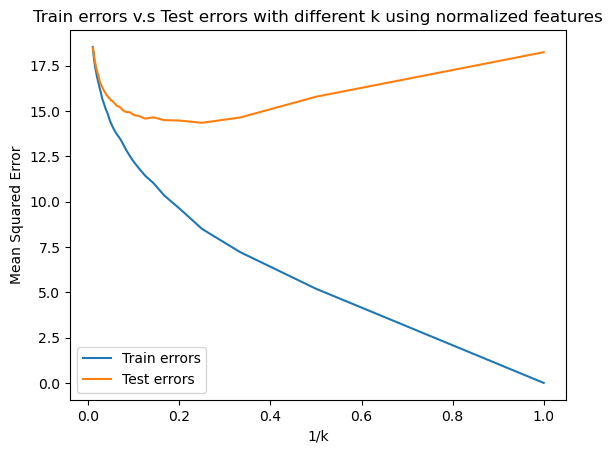

In [47]:
rec_ks = list()
rec_ks = [1/k for k in range(1,101)]

plt.plot(rec_ks, train_mse_list, label="Train errors") #change to 1/k
plt.plot(rec_ks, test_mse_list, label="Test errors")

plt.title("Train errors v.s Test errors with different k using normalized features")
plt.legend()

plt.xlabel("1/k")
plt.ylabel("Mean Squared Error")

Text(0, 0.5, 'Error rate')

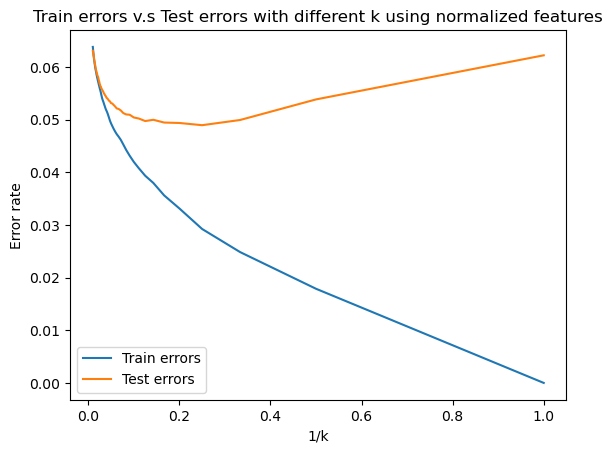

In [48]:
rec_ks = list()
rec_ks = [1/k for k in range(1,101)]

plt.plot(rec_ks, train_errors, label="Train errors") #change to 1/k
plt.plot(rec_ks, test_errors, label="Test errors")

plt.title("Train errors v.s Test errors with different k using normalized features")
plt.legend()

plt.xlabel("1/k")
plt.ylabel("Error rate")

#### Raw Features

In [49]:
X = df.drop('PE', axis=1) #raw feature
y = df.PE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

knnModel = KNeighborsRegressor()

train_errors = list()
test_errors = list()
ks=list()
train_mse_list = list()
test_mse_list = list()

errorbestk = list()
bestk = list()
best_MSE = 100
best_test_error = 1

for k in range(1,101):
    knnModel.set_params(n_neighbors=k)
    knnModel.fit(X_train, y_train)
    #knnpred = knnModel.predict(X_test.values)
    
    knn_train_error_rate = 1-knnModel.score(X_train.values, y_train)
    train_errors.append(knn_train_error_rate)
    knn_test_error_rate = 1-knnModel.score(X_test.values, y_test)
    test_errors.append(knn_test_error_rate)
    
    y_pred = knnModel.predict(X_test)
    y_pred_train = knnModel.predict(X_train)
    knn_test_mse = mean_squared_error(y_test, y_pred)
    test_mse_list.append(knn_test_mse)
    knn_train_mse = mean_squared_error(y_train, y_pred_train)
    train_mse_list.append(knn_train_mse)

    
    ks.append(k)
    print("k =",k)
    print("Train error rate: ", knn_train_error_rate)
    print("Test error rate: ", knn_test_error_rate)
    print("train MSE:", knn_train_mse)
    print("test MSE:", knn_test_mse)
    print()
    
    if(knn_test_error_rate < best_test_error):
        errorbestk.clear()
        best_test_error = knn_test_error_rate
        errorbestk.append(k)
    elif(knn_test_error_rate == best_test_error):
        errorbestk.append(k)
    else:
        continue
    
    # Specify the best k base on the test MSE
    if(knn_test_mse < best_MSE):
        bestk.clear()
        best_MSE = knn_test_mse
        bestk.append(k)
    elif(knn_test_mse == best_MSE):
        bestk.append(k)
    else:
        continue
        
print("\nbest k = ",bestk)
print("best test MSE = ", best_MSE)
print("\nbest error rate k = ",errorbestk)
print("best test error rate = ", best_test_error)

k = 1
Train error rate:  0.0
Test error rate:  0.06935655572769761
train MSE: 0.0
test MSE: 20.33254312086381

k = 2
Train error rate:  0.018939199642772686
Test error rate:  0.05916260242252125
train MSE: 5.500468422427952
test MSE: 17.344087408568438

k = 3
Train error rate:  0.027981322027587185
Test error rate:  0.05573359289324764
train MSE: 8.12655133973753
test MSE: 16.33884019892411

k = 4
Train error rate:  0.03252010593072463
Test error rate:  0.05393223435072203
train MSE: 9.444739964723011
test MSE: 15.810754571577844

k = 5
Train error rate:  0.0365005419374449
Test error rate:  0.05364592369711796
train MSE: 10.600768887561596
test MSE: 15.726819842563568

k = 6
Train error rate:  0.03920850394431474
Test error rate:  0.05387585074934176
train MSE: 11.387236097838164
test MSE: 15.794225175122872

k = 7
Train error rate:  0.04126255653957078
Test error rate:  0.05404102897298779
train MSE: 11.983789893738589
test MSE: 15.842648764207883

k = 8
Train error rate:  0.04317000

k = 60
Train error rate:  0.06803746466749627
Test error rate:  0.06727443738851135
train MSE: 19.759965204677048
test MSE: 19.72215005174347

k = 61
Train error rate:  0.06818958329298941
Test error rate:  0.06744928913279558
train MSE: 19.804144669056246
test MSE: 19.77340952668591

k = 62
Train error rate:  0.06843392049968788
Test error rate:  0.06758537431454337
train MSE: 19.87510696499372
test MSE: 19.81330420999255

k = 63
Train error rate:  0.06867688536603966
Test error rate:  0.06770786691119068
train MSE: 19.945670695263978
test MSE: 19.84921409590293

k = 64
Train error rate:  0.06889382469553229
Test error rate:  0.06789210078592611
train MSE: 20.008675888406476
test MSE: 19.903224032859573

k = 65
Train error rate:  0.06912095252923667
Test error rate:  0.06807542905149766
train MSE: 20.074640105517524
test MSE: 19.95696848175697

k = 66
Train error rate:  0.06934462119679397
Test error rate:  0.06821992734591986
train MSE: 20.139599684918466
test MSE: 19.999329550172252

best k = 5<br>
best test MSE =  15.726819842563568<br>
best test error rate =  0.05364592369711796

Plot

Text(0, 0.5, 'Mean Squared Error')

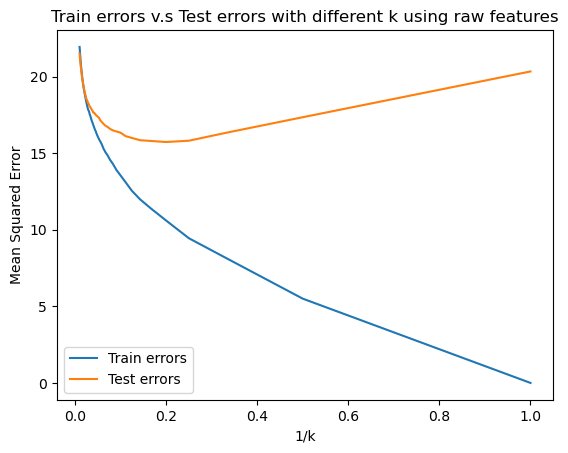

In [50]:
rec_ks = list()
rec_ks = [1/k for k in range(1,101)]

plt.plot(rec_ks, train_mse_list, label="Train errors") #change to 1/k
plt.plot(rec_ks, test_mse_list, label="Test errors")

plt.title("Train errors v.s Test errors with different k using raw features")
plt.legend()

plt.xlabel("1/k")
plt.ylabel("Mean Squared Error")

Text(0, 0.5, 'Error rate')

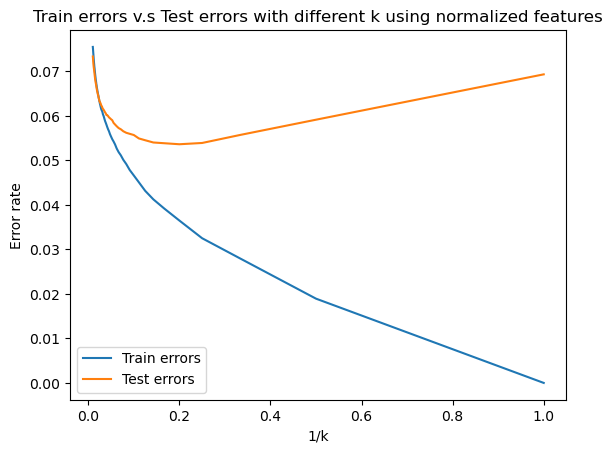

In [51]:
rec_ks = list()
rec_ks = [1/k for k in range(1,101)]

plt.plot(rec_ks, train_errors, label="Train errors") #change to 1/k
plt.plot(rec_ks, test_errors, label="Test errors")

plt.title("Train errors v.s Test errors with different k using normalized features")
plt.legend()

plt.xlabel("1/k")
plt.ylabel("Error rate")

### (j) Compare KNN and Linear

KNN:<br>
Normalized features:<br>
best k = 4<br>
best test MSE = 14.348653474399166<br>
best test error rate =  0.04894484562993062
<br><br>
Raw features:<br>
best k = 5<br>
best test MSE =  15.726819842563568<br>
best test error rate = 0.05364592369711796
<br><br>

Linear Regression:<br>
the test MSE: 18.381261435836397<br>
The test error rate:  0.06270051786152586

#### In these results, the KNN regression model with normalized features, when the k is equal to 4, has the smallest MSE, 14.348653474399166, and the smallest test error rate, 0.04894484562993062, which would probably the most fit. 

## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

The flexible method would do better in this scenario; it can learn the character of the data from the large amount of the sample size and, to some degree, avoid overfitting.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

The flexible statistic model would be overfitting more easily because plenty of predictors would become noise easily and because of the lack of observations(samples), the model would put emphasis on those observations while training. Therefore, the inflexible method would do better in this scenario.

### (c) The relationship between the predictors and response is highly non-linear.

The flexible mothod would do better in this scenario; Inflexible method would have many trouble dealing with the non-linear relationship.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

The flexible method would perform worse than the inflexible method. High Var(ε) means the samples have a lot of noise and the flexible method is much more sensitive to the noise than the inflexible method, which means the flexible method would fit to the noise.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [52]:
def Euc_distance(x1:list ,x2:list) -> float:
    distance = 0.0
    if(len(x1) == len(x2)):
        for i in range(len(x1)):
            distance += pow((x1[i]-x2[i]), 2)
        distance = distance ** 0.5
    else:
        print("error:two data points have different dimension!")
        
    return distance

X1 = [0,3,0]
X2 = [2,0,0]
X3 = [0,1,3]
X4 = [0,1,2]
X5 = [-1,0,1]
X6 = [1,1,1]
testP = [0,0,0]

point_list = [X1, X2, X3, X4, X5, X6, testP]
point_name_list = ['X1','X2','X3','X4','X5','X6','testP']

for i in range(7):
    for j in range(i+1,7):
        distance = Euc_distance(point_list[i], point_list[j])
        print("The distance between",point_name_list[i]+ " & "+ point_name_list[j]+ ": ",distance)
    print()

The distance between X1 & X2:  3.605551275463989
The distance between X1 & X3:  3.605551275463989
The distance between X1 & X4:  2.8284271247461903
The distance between X1 & X5:  3.3166247903554
The distance between X1 & X6:  2.449489742783178
The distance between X1 & testP:  3.0

The distance between X2 & X3:  3.7416573867739413
The distance between X2 & X4:  3.0
The distance between X2 & X5:  3.1622776601683795
The distance between X2 & X6:  1.7320508075688772
The distance between X2 & testP:  2.0

The distance between X3 & X4:  1.0
The distance between X3 & X5:  2.449489742783178
The distance between X3 & X6:  2.23606797749979
The distance between X3 & testP:  3.1622776601683795

The distance between X4 & X5:  1.7320508075688772
The distance between X4 & X6:  1.4142135623730951
The distance between X4 & testP:  2.23606797749979

The distance between X5 & X6:  2.23606797749979
The distance between X5 & testP:  1.4142135623730951

The distance between X6 & testP:  1.7320508075688772


### (b) What is our prediction with K = 1? Why?

The nearest neighbor to test point(0,0,0) is <b>X5</b> the distance is 1.4142135623730951

K=1 means to find <b>ONE</b> nearest neighbor of the test point (0,0,0). The X5 observation is Green, so the test point would be predicted as <b>Green</b> as well.

### (c) What is our prediction with K = 3? Why?

Similarly, K=3 means to find <b>THREE</b> nearest neighbors of the test point (0,0,0). 
The three nearest neighbors to test point are <b>X5, X6,and X2</b>, which the distance are 1.4142135623730951, 1.7320508075688772,and 2.0 respectively. The data point's Y is shown as below.
|Obs.| Y|
|--|-----|
|X5|Green|
|X6|Red|
|X2|Red|

Therefore, the test point would be considered as <b>Red</b>, the majority one. (Green:Red = 1:2)

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

If the Bayes decision boundary is highly non-linear, it means the boundary line is inflexible, more wiggly, and tries to fit every data. Therefore, K has to be small.